In [5]:
"""
CR component of simulated SFOAE data

Author: havlajos
Created: 18/05/2023
Last Update: 11/07/2023

Description: CR component is caused by reflections in the cochlea. Simulations come from a nonlinear cochlear model.
CR component is a sum of its subcomponents where each subcomponent represents an additional reflection in cochlea.
The first subcomponent represents no additional reflection allowing us to point out the influence of multiple reflections in cochlea.
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# script importing
from peak_picking import *
from gradient_delay import *

# CR components data loading
CR_FILENAME = 'data/CR_comp/CRc20dBR19rs20.mat'
mat_CR = scipy.io.loadmat(CR_FILENAME)
freq_axis = mat_CR['Fvect'].flatten()  # frequency axis
CR_1 = mat_CR['CRc20_1'].flatten()  # no reflection
CR_2 = mat_CR['CRc20_2'].flatten()  # after 1 additional reflection
CR_3 = mat_CR['CRc20_3'].flatten()  # after 2 additional reflections
freq_range_SFOAE = np.size(freq_axis)

# SFOAE data loading
SFOAE_FILENAME = 'data/SFOAE_20dB_inhom/sfoae20dBg130TM45R19rs2.mat'
mat_SFOAE = scipy.io.loadmat(SFOAE_FILENAME)
CRcomp = mat_SFOAE['CRc20'].flatten()  # CR component


In [6]:
freq_range_CR = freq_range_SFOAE
freq_CR = freq_axis

# peak picking CR total
maximas_CR = findLocalMaxima(np.real(20*np.log10(CRcomp)))
shift = 1  # 3 points around all peaks (the peak is included)
ext_maximas_CR = peakNeighbours(maximas_CR, shift, freq_range_CR)

group_delay_CR = calcDelay(freq_CR, CRcomp)

# peak picking CR_1
maximas_CR_1 = findLocalMaxima(np.real(20*np.log10(CRcomp)))
shift = 1  # 3 points around all peaks (the peak is included)
ext_maximas_CR_1 = peakNeighbours(maximas_CR_1, shift, freq_range_CR)

group_delay_CR_1 = calcDelay(freq_CR, CR_1)

In [7]:
from isoint import *

ISOINT_start, ISOINT_stop, ISOINT_step = 1000, 3200, 200

freq_ISOINT_list = []
GD_ISOINT_list = []
max_idx_ISOINT_list = []

for i in range(ISOINT_start, ISOINT_stop + 1, ISOINT_step):
    filename = f"data/isointFT/isoint_{i}Hz_Level_20dB_TM45130.mat"
    freq_ISOINT, group_delay_ISOINT, max_idx_ISOINT = processIsoInt(filename)

    freq_ISOINT_list.append(freq_ISOINT)
    GD_ISOINT_list.append(group_delay_ISOINT)
    max_idx_ISOINT_list.append(max_idx_ISOINT)


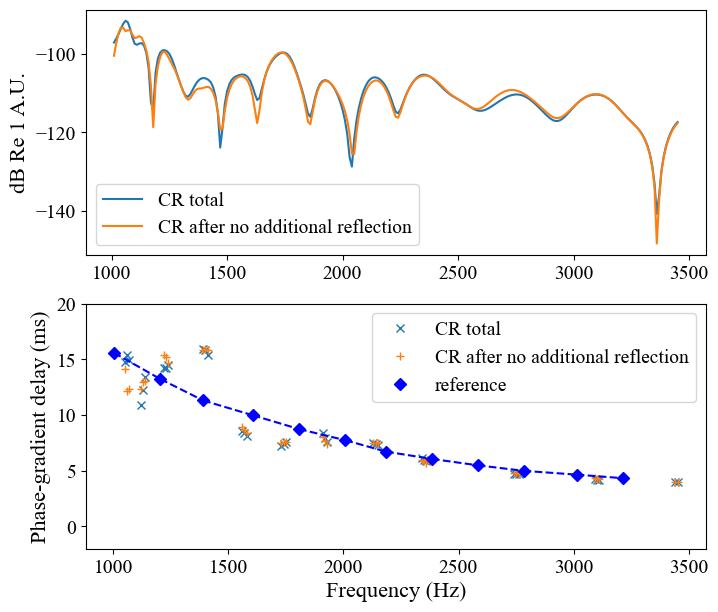

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 7))
plt.rcParams['font.family'] = 'Times New Roman'
# ax.plot(freq_axis, 20*np.log10(np.abs(CR_2)), label="CR 2")
# ax.plot(freq_axis, 20*np.log10(np.abs(CR_3)), label="CR 3")
ax1.plot(freq_axis, 20*np.log10(np.abs(CRcomp)), label="CR total")
ax1.plot(freq_axis, 20*np.log10(np.abs(CR_1)), label="CR after no additional reflection")
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylabel("dB Re 1 A.U.", fontdict={"fontsize": 16})
ax1.legend(fontsize=14)

ax2.plot(freq_axis[ext_maximas_CR], 1000 *
         group_delay_CR[ext_maximas_CR], "x" ,label="CR total")
ax2.plot(freq_axis[ext_maximas_CR], 1000 *
         group_delay_CR_1[ext_maximas_CR], "+", label="CR after no additional reflection")
# reference values
for i, freq_ISOINT in enumerate(freq_ISOINT_list):
    max_idx = max_idx_ISOINT_list[i]
    grad_delay_ISOINT = GD_ISOINT_list[i]
    ax2.plot(freq_ISOINT[max_idx], 1000*grad_delay_ISOINT[max_idx],
            "bD", label='reference' if i == 0 else None)
    if i > 0:  # connect points starting from the second point
        ax2.plot([freq_ISOINT_list[i-1][max_idx_ISOINT_list[i-1]], freq_ISOINT[max_idx]],
                [1000*GD_ISOINT_list[i-1][max_idx_ISOINT_list[i-1]],
                    1000*grad_delay_ISOINT[max_idx]],
                "b--")

ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_ylabel("Phase-gradient delay (ms)", fontdict={"fontsize": 16})
ax2.set_xlabel("Frequency (Hz)", fontdict={"fontsize": 16})
ax2.set_ylim(-2, 20)
ax2.legend(fontsize=14)

# plt.savefig("CR_comp.png", dpi=300)
plt.show()